# Testing orthotropic linear elasticity

In [3]:
import mtest
import numpy as np
import matplotlib.pyplot as plt
import os
plt.rcParams.update({'font.size': 22})

In [4]:
build_release = 'mfront --obuild --interface=generic StandardElasticityBrickOrtho.mfront'
build_debug = 'mfront --obuild --interface=generic --debug StandardElasticityBrickOrtho.mfront'
os.system(build_release)

0

In [5]:
em = 1.e-2
tmax = 6

In [6]:
m = mtest.MTest()
mtest.setVerboseMode(mtest.VerboseLevel.VERBOSE_QUIET)
m.setMaximumNumberOfSubSteps(1)

In [7]:
m.setBehaviour('generic', './src/libBehaviour.so', 'StandardElasticityBrickOrtho')

In [8]:
m.setExternalStateVariable("Temperature", 293.15)
m.setImposedStrain('EXX', {0: 0, tmax / 6: em, tmax / 3: 0})
m.setImposedStrain('EYY', {tmax / 3: 0, tmax / 2: em, 2 * tmax / 3: 0})
m.setImposedStrain('EZZ', {2 * tmax / 3: 0, 5 * tmax / 6: em, tmax: 0})

In [9]:
m.setMaterialProperty('YoungModulus1', 150.e3)
m.setMaterialProperty('YoungModulus2', 50.e3)
m.setMaterialProperty('YoungModulus3', 250.e3)
m.setMaterialProperty('PoissonRatio12', 0.13)
m.setMaterialProperty('PoissonRatio23', 0.24)
m.setMaterialProperty('PoissonRatio13', 0.18)
m.setMaterialProperty('ShearModulus12', 60e3)
m.setMaterialProperty('ShearModulus23', 30e3)
m.setMaterialProperty('ShearModulus13', 180e3)

In [10]:
s = mtest.MTestCurrentState()
wk = mtest.MTestWorkSpace()
m.completeInitialisation()
m.initializeCurrentState(s)
m.initializeWorkSpace(wk)

In [11]:
ltime = np.linspace(0,tmax,100)

exx = np.array([0.])
eyy = np.array([0.])
ezz = np.array([0.])
sxx = np.array([0.])
syy = np.array([0.])
szz = np.array([0.])


for i in range(len(ltime) - 1):
    m.execute(s, wk, ltime[i], ltime[i + 1])
    exx = np.append(exx,s.e1[0])
    eyy = np.append(eyy,s.e1[1])
    ezz = np.append(ezz,s.e1[2])
    sxx = np.append(sxx,s.s1[0])
    syy = np.append(syy,s.s1[1])
    szz = np.append(szz,s.s1[2])

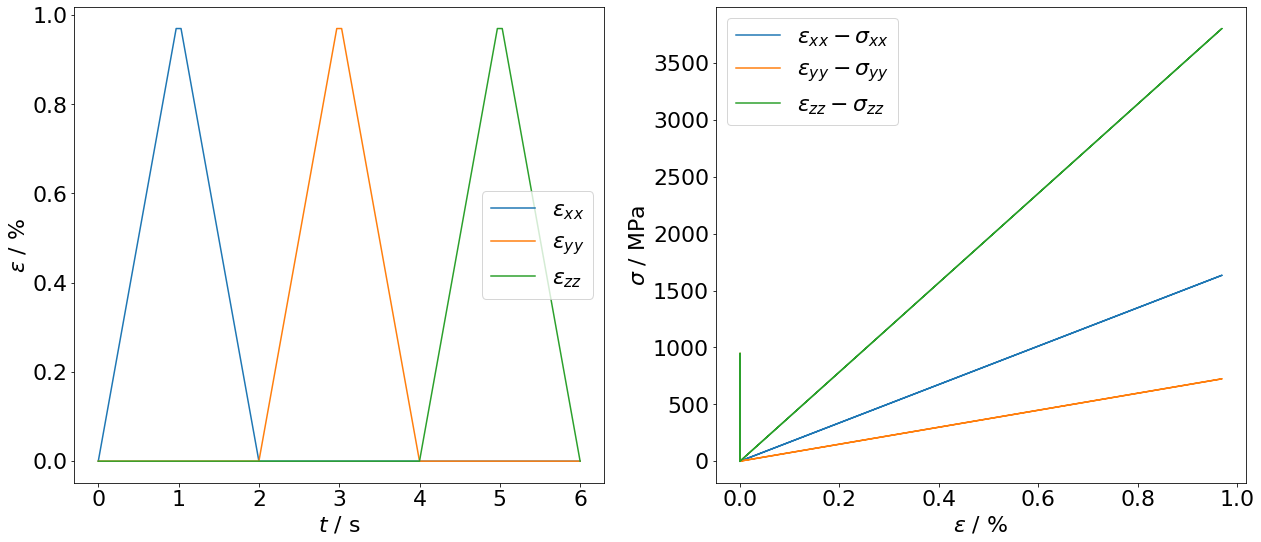

In [14]:
fig,ax = plt.subplots(ncols=2,figsize=(18,8))
ax[0].plot(ltime,exx*100,label='$\\epsilon_{xx}$')
ax[0].plot(ltime,eyy*100,label='$\\epsilon_{yy}$')
ax[0].plot(ltime,ezz*100,label='$\\epsilon_{zz}$')
ax[0].set_xlabel('$t$ / s')
ax[0].set_ylabel('$\\epsilon$ / %')
ax[0].legend()

ax[1].plot(exx*100,sxx,label='$\\epsilon_{xx}-\\sigma_{xx}$')
ax[1].plot(eyy*100,syy,label='$\\epsilon_{yy}-\\sigma_{yy}$')
ax[1].plot(ezz*100,szz,label='$\\epsilon_{zz}-\\sigma_{zz}$')
ax[1].set_xlabel('$\\epsilon$ / %')
ax[1].set_ylabel('$\\sigma$ / MPa')
ax[1].legend()

fig.tight_layout();